<a href="https://colab.research.google.com/github/Augustswang/Courseactivity/blob/main/ShuaiWang_MSFTDuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import requests
import pandas as pd
myAPIKey = 'c21965ffbbeaa2eb1bb1b2bce999a80c'

stock = 'MSFT'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()

incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()



In [39]:
print (balanceStatements[:6])

[{'date': '2021-06-30', 'symbol': 'MSFT', 'reportedCurrency': 'USD', 'cik': '0000789019', 'fillingDate': '2021-07-29', 'acceptedDate': '2021-07-29 16:21:55', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 11748000000, 'shortTermInvestments': 118586000000, 'cashAndShortTermInvestments': 130334000000, 'netReceivables': 38043000000, 'inventory': 2636000000, 'otherCurrentAssets': 13393000000, 'totalCurrentAssets': 184406000000, 'propertyPlantEquipmentNet': 70803000000, 'goodwill': 49711000000, 'intangibleAssets': 7800000000, 'goodwillAndIntangibleAssets': 57511000000, 'longTermInvestments': 5984000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 15075000000, 'totalNonCurrentAssets': 149373000000, 'otherAssets': 0.0, 'totalAssets': 333779000000, 'accountPayables': 15163000000, 'shortTermDebt': 8072000000, 'taxPayables': 2174000000, 'deferredRevenue': 41525000000, 'otherCurrentLiabilities': 23897000000, 'totalCurrentLiabilities': 88657000000, 'longTermDebt': 59703000000, 'd

In [42]:
twoYearBalanceStatement = balanceStatements[:5]
twoYearIncomeStatement = incomeStatements[:5]

In [43]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]

dates=[]

for i in range (0,5):
  dates.append(twoYearBalanceStatement[i]['date'])
  profitabilityValue = twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue = twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue = twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue = profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

 

In [44]:
print(returnOnEquity)

[0.4315223821731414, 0.37429841763592103, 0.3834652594547054, 0.20033124591987234, 0.2928972014255325]


In [45]:
import pandas as pd

DupontDF = pd.DataFrame(columns=['date', 'profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity'])
DupontDF['date'] = dates 
DupontDF['profitability']=profitability
DupontDF['assetTurnOver']=assetTurnOver
DupontDF['capitalStructure']=capitalStructure
DupontDF['returnOnEquity']=returnOnEquity

print(DupontDF)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2021-06-30       0.364517       0.503591          2.350755        0.431522
1  2020-06-30       0.309625       0.474642          2.546921        0.374298
2  2019-06-30       0.311817       0.439157          2.800313        0.383465
3  2018-06-30       0.150154       0.426351          3.129283        0.200331
4  2017-06-30       0.235731       0.373103          3.330193        0.292897


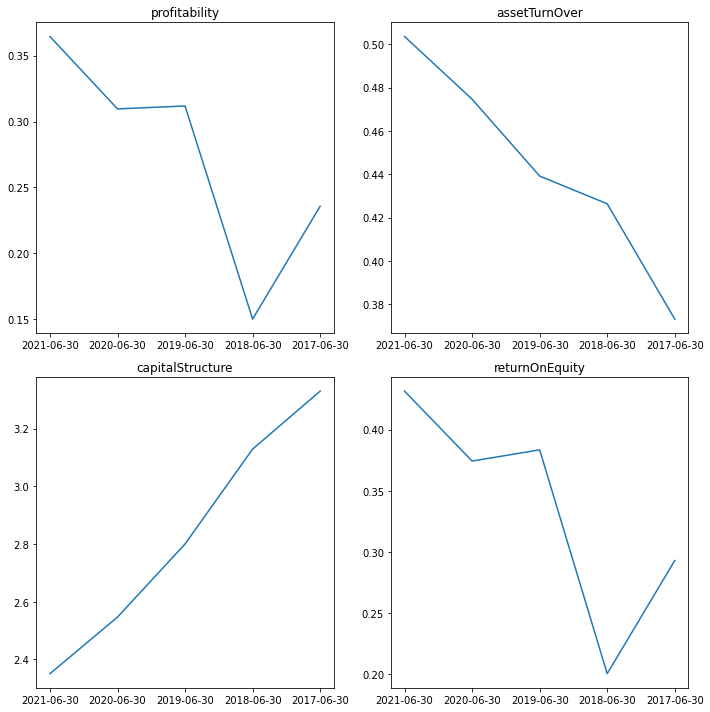

In [46]:
fig,axs= plt.subplots(2,2, figsize=(10,10))
x=DupontDF['date'] 
values=['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot (x,DupontDF[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])

fig.tight_layout()